In [1]:
import numpy as np
import tensorflow as tf
from random import sample
from captcha.image import ImageCaptcha
from reader import CaptchaReader

In [2]:
width = 100
height = 60
charset = '0123456789'
def getCode():
    return ''.join(map(lambda x: charset[x], np.random.randint(0, 10, 4)))
captcha = ImageCaptcha(width=width, height=height)

In [3]:
def getData(n = 10):    
    codeList = [getCode() for _ in range(n)]
    imageList = map(lambda code: captcha.generate_image(code), codeList)
    return imageList, codeList

In [4]:
reader = CaptchaReader(width, height, 4, charset)
session = tf.InteractiveSession(graph=reader.graph) 
tf.global_variables_initializer().run()

In [8]:
for i, _ in enumerate(range(10000), 1):
    imageList, codeList = getData(100)
    batch_data = np.array(map(reader.imageToVertor, imageList))
    batch_labels = np.array(map(reader.codeToVertor, codeList))
    reader.step += 1
    _, loss = session.run(
        [reader.optimizer, reader.loss],
        feed_dict={
            reader.x: batch_data,
            reader.y: batch_labels,
            reader.keep_prob: 0.75
        }   
    ) 
    print u'[%d]: loss: %f' % (i, loss)

[1]: loss: 0.045762
[2]: loss: 0.042304


KeyboardInterrupt: 

In [6]:
saver = tf.train.Saver()
saver.save(session, 'captcha',global_step=1000)

'captcha-1000'

[[8 0 4 8]]


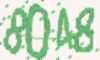

In [63]:
imageList, codeList = getData(1)
batch_data = np.array(map(reader.imageToVertor, imageList))
batch_labels = np.array(map(reader.codeToVertor, codeList))
reader.step += 1
accuracy, prediction = session.run(
    [reader.accuracy, reader.prediction],
    feed_dict={
        reader.x: batch_data,
        reader.y: batch_labels,
        reader.keep_prob: 1
    }   
) 
print prediction
imageList[0]